# 6.4 Supervised Machine Learning: Regression

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/rachelgrigiac/Documents/CareerFoundry/BIXI Project Analysis/02 Data'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'bixitrips_weather_last.pkl'))

### 2. Data cleaning

In [5]:
df.columns

Index(['start_station_code', 'end_station_code', 'duration_sec', 'is_member',
       'yearid', 'date', 'start_time', 'prectot', 'rh2m', 't2m', 't2m_max',
       't2m_min', 't2m_range', 'ws10m', 'ws10m_min', 'ws10m_max',
       'ws10m_range', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'month', 'season', 'day_of_week', 'distance',
       'monthly_trip_count'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head(20)

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,month,season,day_of_week,distance,monthly_trip_count
10143245,7060,7060,1860.0,True,2017,2017-04-15,00:00:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de l'Église / de Verdun,45.463001,-73.571569,4,Spring,Saturday,0.000000,187883
10143246,7060,6406,1020.0,True,2017,2017-04-15,09:37:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143247,7060,6406,1080.0,True,2017,2017-04-15,09:37:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143248,7060,6712,2160.0,True,2017,2017-04-15,11:34:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,LaSalle / Crawford,45.437914,-73.582740,4,Spring,Saturday,2.922527,187883
10143249,7060,6052,3120.0,False,2017,2017-04-15,11:53:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de la Commune / King,45.498030,-73.552665,4,Spring,Saturday,4.164580,187883
10143250,7060,6052,2760.0,False,2017,2017-04-15,11:54:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de la Commune / King,45.498030,-73.552665,4,Spring,Saturday,4.164580,187883
10143251,7060,6705,300.0,True,2017,2017-04-15,12:39:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,5e avenue / Bannantyne,45.456365,-73.576140,4,Spring,Saturday,0.819509,187883
10143252,7060,7057,300.0,True,2017,2017-04-15,12:50:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,2e avenue / Wellington,45.457894,-73.567528,4,Spring,Saturday,0.649512,187883
10143253,7060,7056,2760.0,True,2017,2017-04-15,13:26:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Godin / Bannantyne,45.447554,-73.577263,4,Spring,Saturday,1.774168,187883
10143254,7060,6036,1020.0,False,2017,2017-04-15,14:55:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de la Commune / St-Sulpice,45.504242,-73.553469,4,Spring,Saturday,4.798007,187883


In [9]:
df.shape

(18394028, 28)

In [10]:
# Check for missing values

df.isnull().sum()


start_station_code         0
end_station_code           0
duration_sec               0
is_member                  0
yearid                     0
date                       0
start_time                 0
prectot                    0
rh2m                       0
t2m                        0
t2m_max                    0
t2m_min                    0
t2m_range                  0
ws10m                      0
ws10m_min                  0
ws10m_max                  0
ws10m_range                0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
month                      0
season                     0
day_of_week                0
distance                   0
monthly_trip_count         0
dtype: int64

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(18394028,)

### 3. Data prep for regression analysis 

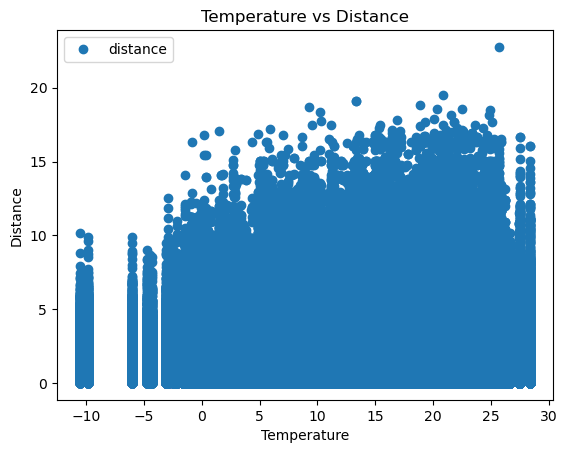

In [14]:
# Create a scatterplot using matplotlib

df.plot(x = 't2m', y='distance',style='o') 
plt.title('Temperature vs Distance')  
plt.xlabel('Temperature')  
plt.ylabel('Distance')  
plt.show()

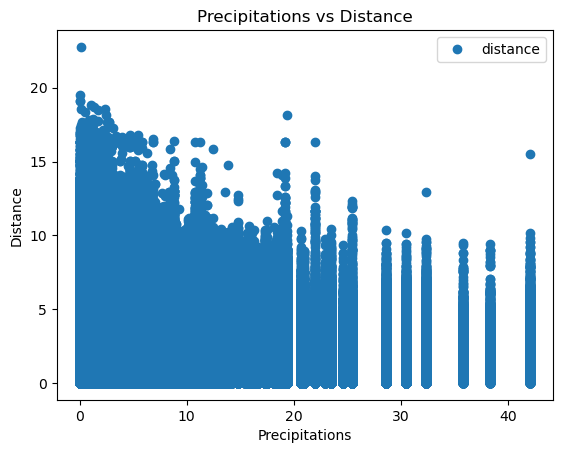

In [31]:
# Create a scatterplot using matplotlib

df.plot(x = 'prectot', y='distance',style='o') 
plt.title('Precipitations vs Distance')  
plt.xlabel('Precipitations')  
plt.ylabel('Distance')  
plt.show()

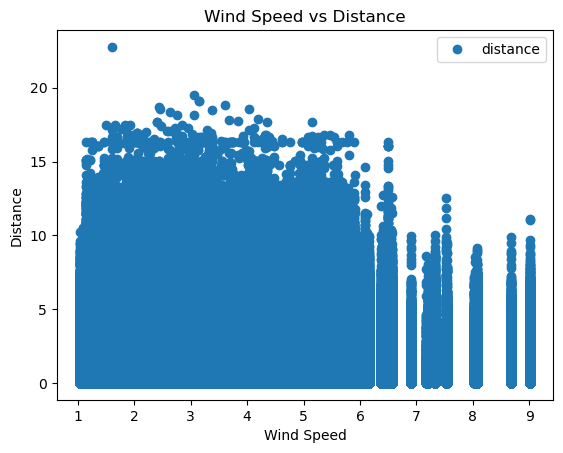

In [32]:
# Create a scatterplot using matplotlib

df.plot(x = 'ws10m', y='distance',style='o') 
plt.title('Wind Speed vs Distance')  
plt.xlabel('Wind Speed')  
plt.ylabel('Distance')  
plt.show()

### Hypothesis:
#### If the weather conditions in a given year are characterized by moderate temperatures, low precipitation, and moderate wind speeds, then that year will be the most profitable for Bixi.

#### 1. Temperature vs Distance

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['t2m'].values.reshape(-1,1)
y = df['distance'].values.reshape(-1,1)

In [16]:
X

array([[9.49],
       [9.49],
       [9.49],
       ...,
       [0.59],
       [0.59],
       [0.59]])

In [17]:
y

array([[0.        ],
       [1.97026918],
       [1.97026918],
       ...,
       [0.47220665],
       [0.50796121],
       [0.7934983 ]])

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [19]:
# Create a regression object.

regression = LinearRegression()

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

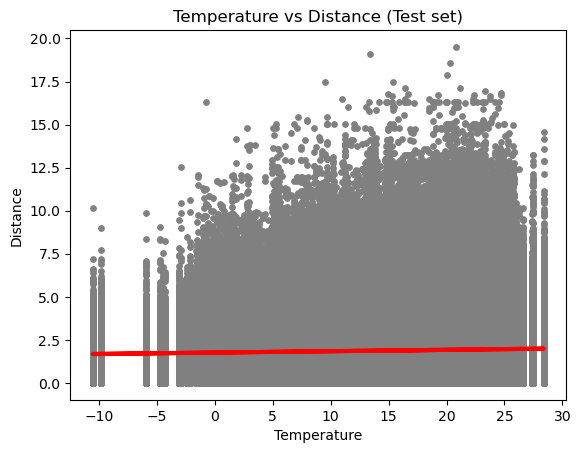

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Temperature vs Distance (Test set)')
plot_test.xlabel('Temperature')
plot_test.ylabel('Distance')
plot_test.show()

The red line remains almost flat at a very low distance value, suggesting that the model does not account for the variability in distance across different temperatures. The model predicts almost the same distance regardless of temperature, which is not reflective of the observed data spread. I think the the relationship between temperature and distance is not linear.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00802459]]
Mean squared error:  1.996460985320671
R2 score:  0.0012121288771598238


In [25]:
y_predicted

array([[1.87588864],
       [1.95075803],
       [1.88423421],
       ...,
       [1.91199928],
       [1.83167316],
       [1.91304247]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.135790,1.875889
1,1.794888,1.950758
2,0.704990,1.884234
3,1.152799,1.938641
4,0.464109,1.870512
5,0.803371,1.841463
6,1.258277,1.917456
7,3.112787,1.937999
8,0.736639,1.953005
9,1.326380,1.954610


Upon examining the scatter plot of temperature vs. distance in the test set and the dataframe, it is evident that the linear model  does not fit the data well. A more complex model could lead to better insights and predictions.


Of course, people will always use Bixis regardless of the weather, and the majority of trips will remain at shorter distances. However, the data shows a larger spread in distances at higher temperatures, with more outliers at greater distances. It seems that people who travel longer distances are more inclined to use a Bixi when the temperature is high.

#### Bonus:

In [27]:
# Compare how the regression fits the training set
y_predicted_train = regression.predict(X_train)

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00802459]]
Mean squared error:  1.9959013481672356
R2 score:  0.0011965504866037202


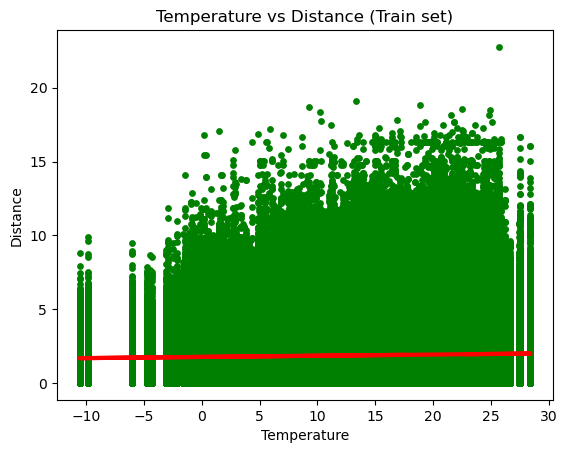

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Temperature vs Distance (Train set)')
plot_test.xlabel('Temperature')
plot_test.ylabel('Distance')
plot_test.show()

#### 2. Temperature vs Monthly Trip Count

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['t2m'].values.reshape(-1,1)
y = df['monthly_trip_count'].values.reshape(-1,1)

In [9]:
X

array([[9.49],
       [9.49],
       [9.49],
       ...,
       [0.59],
       [0.59],
       [0.59]])

In [10]:
y

array([[187883],
       [187883],
       [187883],
       ...,
       [144492],
       [144492],
       [144492]])

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
# Create a regression object.

regression = LinearRegression()

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

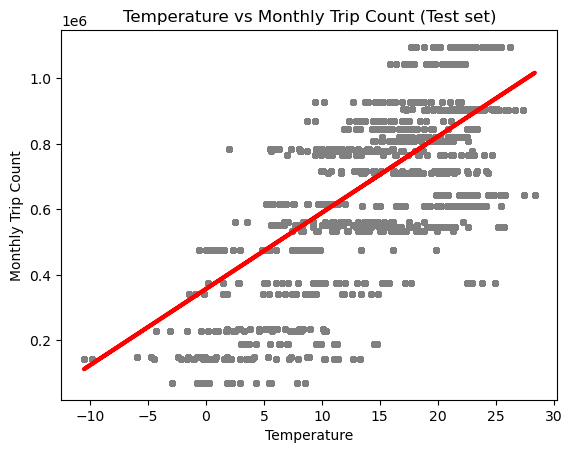

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Temperature vs Monthly Trip Count (Test set)')
plot_test.xlabel('Temperature')
plot_test.ylabel('Monthly Trip Count')
plot_test.show()

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [17]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[23241.12269335]]
Mean squared error:  32081873946.168648
R2 score:  0.3840314395507839


In [18]:
y_predicted

array([[687647.74825418],
       [904487.42298314],
       [711818.51585526],
       ...,
       [792232.80037426],
       [559589.16221382],
       [795254.14632439]])

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,546456,687647.748254
1,902892,904487.422983
2,926547,711818.515855
3,645127,869393.327716
4,870845,672076.196050
5,766331,587943.331900
6,926547,808036.763806
7,906254,867534.037901
8,906254,910994.937337
9,766331,915643.161876
